## 5.3. THAO TÁC VỚI CSDL SQLite VỚI PYTHON
### **5.3.1. Kết nối với SQL**
#### **5.3.1.1. import mô đun SQLite**
#### Cú pháp:
```PYTHON
    import sqlite3
```
#### Mô đun SQLite3 đã được tích hợp sẵn trong Python

#### **5.3.1.2. Tạo kết nối - Create Connection**
#### **a. Hàm** `sqlite3.connect`(): **Thiết lập kết nối**
* #### **Định nghĩa**: sqlite3.connect() là hàm (function)  chính trong module sqlite3 của Python, dùng để thiết lập kết nối giữa chương trình Python và file Cơ sở dữ liệu SQLite (.db).
* #### **Cách sử dụng**: Hàm này nhận **đường dẫn** của file cơ sở dữ liệu và trả về một **đối tượng kết nối**  (thường đặt tên là conn).

* #### Cú pháp ví dụ:
```Python
   conn = sqlite3.connect('mydatabase.db')
```
* **Cơ chế:** 
  - Nếu file  'mydatabase.db' đã tồn tại, hàm sẽ kết nối tới cơ sở dữ liệu đó. 
  - Nếu file chưa tồn tại, SQLite sẽ tự động tạo một mới CSDL với tên 'mydatabase.db'.
#### **Lưu ý**: *Cần cẩn thận khi hàm tự động tạo file mới để tránh nhầm lẫn hoặc mất dữ liệu nếu bạn đang cố gắng kết nối tới một file CSDL có sẵn nhưng gõ sai tên.*




#### **b. Đối tượng conn (Connection Object)**
* #### Vai trò: conn là đối tượng kết nối, đại diện cho **kết nối vật lý** giữa chương trình Python và file CSDL SQLite.

* #### **Chức năng chính:** Nó là cầu nối để bạn có thể thực thi các lệnh SQL thông qua đối tượng Cursor (sẽ được trình bày ở mục sau) và là nơi quản lý giao dịch (Transaction Management). 

#### **c.Quản lý Giao dịch và Đóng Kết nối**
#### Đây là các phương thức bắt buộc phải gọi thông qua đối tượng conn để đảm bảo dữ liệu được lưu trữ và tài nguyên được giải phóng.
#### 1. **conn.**`commit()`: Lưu thay đổi
* #### **Mục đích**: Ghi các thay đổi đã thực hiện (như INSERT, UPDATE, DELETE, CREATE, DROP, v.v.) vào file CSDL thực tế.

* #### **Nguyên tắc:** Theo mặc định, SQLite hoạt động ở chế độ giao dịch. Nếu bạn không gọi commit(), mọi thay đổi sẽ bị mất khi bạn đóng kết nối hoặc khi chương trình kết thúc.
#### 2. **conn.**`close()`: Giải phóng tài nguyên
* #### **Mục đích**: Đóng kết nối tới file CSDL và giải phóng toàn bộ tài nguyên đã sử dụng (bao gồm khóa file - file lock, bộ nhớ đệm, v.v.).
* #### **Bắt buộc**: Luôn phải gọi `close()` sau khi hoàn thành công việc. Nếu không, CSDL có thể bị khóa và bạn có thể gặp lỗi "database is locked" khi cố gắng truy cập lại từ một chương trình khác hoặc một lần chạy khác.

> #### **5.3.1.2.Tạo con trỏ coursor**-Create Cursor
#### **a. Hàm conn.**`cursor` 
* #### **Đinh nghĩa**: Sau khi đã có đối tượng kết nối conn, chúng ta cần tạo một đối tượng con trỏ (cursor object) để thực thi các lệnh SQL. Hàm này được gọi thông qua đối tượng kết nối: conn.cursor().
* #### **Cú pháp**:
```python
        cursor = conn.cursor()
        #Hoặc phổ biến hơn:
        c=conn.cursor()
```
* #### **Vai trò của con trỏ(c)**
  - #### Thực thi SQL: Con trỏ là đối tượng duy nhất có khả năng gọi các phương thức như execute() để gửi câu lệnh SQL đến CSDL.
  - #### Quản lý kết quả: Con trỏ lưu trữ các kết quả (tập kết quả - result set) trả về từ các truy vấn SELECT và cho phép người dùng duyệt qua từng hàng dữ liệu.
#### **Lưu ý**: `coursor` là đối tượng con trỏ, nó trỏ (point) vào từng dòng kết quả giống như con trỏ chuột hoặc con trỏ nhấp nháy trong soạn thảo tài liệu. 

#### **b. Phương thức c.**`execute()`: Thực thi Lệnh SQL
* #### Mục đích: Phương thức cốt lõi để gửi bất kỳ lệnh SQL nào (bao gồm `SELECT, INSERT, UPDATE, CREATE TABLE,...`) đến CSDL.
* #### Cú pháp:
```python
    cursor.execute(sql, parameters)          		# một câu lệnh  
    cursor.executemany(sql, list_of_parameters)     # nhiều bản ghi cùng lúc
```
Trong đó:
* #### execute → *hàm thực thi một câu lệnh SQL duy nhất.*
* #### sql → chuỗi chứa câu lệnh SQL, trong đó dùng **?** hoặc **:tên** làm placeholder.
* #### parameters: là một tuple hoặc dictionary chứa các giá trị thực tế sẽ được thay thế an toàn vào các placeholder ? hoặc :tên trong câu lệnh SQL.
  - Nếu dùng kiểu `?` (theo thứ tự): parameters phải là tuple hoặc list, các giá trị được thay theo đúng thứ tự xuất hiện của ?.
  - Nếu dùng kiểu :`tên` (named parameter): parameters phải là dictionary, key chính là tên sau dấu : và value là giá trị tương ứng.
#### Mục đích chính của `parameter`:
  1. Chống SQL Injection 100% (SQLite tự escape mọi ký tự nguy hiểm).
  2. Tự động xử lý dấu nháy đơn, ngày tháng, None, số… không cần lo lỗi cú pháp.
  3. Code sạch, dễ đọc, dễ bảo trì.
#### Ví dụ 5.3.1.1. Minh họa câu lệnh SQL thực thi con trỏ cursor
```python
cursor.execute('''CREATE TABLE IF NOT EXISTS 
                users(id INTEGER PRIMARY KEY,
                name TEXT, age INTEGER) ''')
cursor.execute("INSERT INTO users (name, age) VALUES(?,?)", ('Nguyễn V A', 30))
conn.commit() # Phải commit để lưu thay đổi cấu trúc bảng
```

#### **c. Lưu ý về phân tách trách nhiệm**
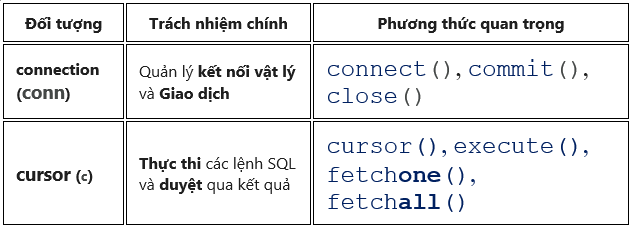

#### **d. Đóng con trỏ** `cursor.close() `
#### Sử dụng hàm `close()` để đóng đối tượng cursor lại, giải phóng tài nguyên mà cursor đang giữ (như bộ nhớ đệm kết quả SQL, vị trí con trỏ hiện tại, v.v.).
#### cursor.close() chỉ cần gọi thủ công khi không dùng with; còn lại để Python tự đóng là an toàn và sạch code nhất.

#### Ví dụ 5.3.1.2. Minh họa các bước kết nối với CSDL và thực thi câu lệnh SQL

In [16]:
import sqlite3

# 1. Kết nối tới cơ sở dữ liệu (tạo file nếu chưa tồn tại)
conn = sqlite3.connect("mydb.db")    # tạo đối tượng kết nối conn để làm việc với CSDL (file mydb.db) được load vào bộ nhớ RAM
# 2. Tạo cursor
cursor = conn.cursor()        # Tạo đối tượng con trỏ từ đối tượng kết nối conn để thực thi các câu lệnh SQL

# 3. Thực thi các câu lệnh SQL
# • SELECT
cursor.execute("SELECT * FROM users WHERE age > ?", (20,))
rows = cursor.fetchall()          # lấy tất cả kết quả
# hoặc
row = cursor.fetchone()           # lấy từng dòng một (thường dùng trong vòng lặp)

# • INSERT, UPDATE, DELETE, CREATE, DROP, v.v.
cursor.execute("INSERT INTO users (name, age) VALUES (?, ?)", ("Bình", 30))
# hoặc nhiều bản ghi cùng lúc:
data = [("Cường", 22), ("Dung", 27), ("An", 19)]
cursor.executemany("INSERT INTO users (name, age) VALUES (?, ?)", data)

# Quan trọng: Với các lệnh thay đổi dữ liệu (INSERT, UPDATE, DELETE, CREATE, DROP...)
# phải gọi commit() thì thay đổi mới được lưu vĩnh viễn!
conn.commit()

# 4. Đóng cursor và kết nối khi xong (tốt nhất dùng context manager)
cursor.close()
conn.close()

In [17]:
print(f"Kiểu dữ liệu của rows:{type(rows)}")

Kiểu dữ liệu của rows:<class 'list'>


In [18]:
rows

[(1, 'Nguyễn Văn A', 30),
 (2, 'Trần Thị B', 25),
 (3, 'Lê Văn C', 27),
 (4, 'Phạm Ngọc D', 31),
 (5, 'Hoàng Yến', 24),
 (6, 'Nguyễn Văn A', 30),
 (7, 'Trần Thị B', 25),
 (8, 'Lê Văn C', 27),
 (9, 'Phạm Ngọc D', 31),
 (10, 'Hoàng Yến', 24),
 (11, 'Nguyễn Văn A', 30),
 (12, 'Trần Thị B', 25),
 (13, 'Lê Văn C', 27),
 (14, 'Phạm Ngọc D', 31),
 (15, 'Hoàng Yến', 24),
 (16, 'Bình', 30),
 (17, 'Cường', 22),
 (18, 'Dung', 27)]

#### **5.3.1.3. Quản lý kết nối an toàn bằng cấu trúc** `with`
#### **a. Vấn đề**:Trong lập trình, việc kết nối CSDL (hoặc mở file) cần phải được đóng (close()) khi hoàn tất, ngay cả khi có lỗi xảy ra. Nếu không đóng, tài nguyên hệ thống có thể bị rò rỉ.
* #### Rò rỉ tài nguyên (Resource Leak): Nếu lỗi xảy ra giữa connect() và close(), lệnh close() sẽ không được gọi.
#### **b. Giải pháp (Context Manager)**:
#### Cấu trúc `with` trong Python (còn gọi là `Context Manager`) đảm bảo rằng các hành động dọn dẹp (`cleanup actions`) sẽ được **thực thi tự động** khi thoát khỏi khối lệnh, bất kể có lỗi hay không.
>#### **Ghi nhớ**: Cấu trúc with tự động gọi hàm conn.`close`() khi khối lệnh kết thúc.!!!


#### Ví dụ 5.3.1.3. Minh họa context manager

In [ ]:
import sqlite3

# Kết nối an toàn bằng cấu trúc WITH
with sqlite3.connect('example_db.db') as conn:
    # 1. Tạo con trỏ (Cursor)
    cursor = conn.cursor()

    # 2. Thực hiện các thao tác SQL
    print("Kết nối thành công. Sẵn sàng thực hiện truy vấn...")

# Tự động đóng kết nối (conn.close()) khi khối lệnh kết thúc

Kết nối thành công. Sẵn sàng thực hiện truy vấn...


#### **5.3.1.4. Truy vấn Dữ Liệu và Lấy kết quả**
#### **a. Thực thi Truy vấn SELECT**
#### sử dụng phương thức cursor.`execute()` với câu lệnh SELECT mong muốn.
* #### Cú pháp ví dụ:
```python
    cursor.execute("SELECT date, symbol, price FROM stocks WHERE price > 100.00")
```
#### Khi thực thi lệnh SELECT:
#### → SQLite tạo ra một tập kết quả (Result Set) chứa tất cả các hàng thỏa mãn điều kiện.
#### → Đối tượng cursor không lưu toàn bộ dữ liệu này mà chỉ giữ một con trỏ vị trí (giống con trỏ nhấp nháy trong file hoặc trong Word).
#### **b.Các phương thức lấy dữ liệu (Fetching methods)**
#### Sau khi thực thi SELECT, sử dụng các phương thức sau để trích xuất dữ liệu từ Tập kết quả:
#### **1. cursor.fetchone()**
#### - Mục đích: Lấy một hàng (row) tiếp theo từ Tập kết quả.
#### - Giá trị trả về:
* #### Trả về một tuple chứa các giá trị của hàng đó.
* #### Nếu không còn hàng nào, trả về None.
#### **2. cursor.fetchall()** 
#### - Mục đích: Lấy tất cả các hàng còn lại từ Tập kết quả, bắt đầu từ vị trí hiện tại của con trỏ.
#### - Giá trị trả về: Trả về một list chứa nhiều tuple, trong đó mỗi tuple là một hàng dữ liệu.   
#### **3. cursor.fetmany**(size=n)
#### - Mục đích: Lấy n hàng tiếp theo từ Tập kết quả.
#### - Giá trị trả về: Tương tự fetchall(), trả về một list các tuple.
#### **c.Lặp qua tập Kết quả**
#### Cách đơn giản và hiệu quả nhất để xử lý kết quả là lặp trực tiếp qua đối tượng con trỏ:
#### Ví dụ:
```python 
        for row in cur:
            print(row)         # in lần lượt từng dòng
```

#### Ví dụ 5.1.3. Minh họa cách lấy dữ liệu

In [ ]:
import sqlite3
conn = sqlite3.connect(":memory:")  # Tạo CSDL tạm thời trong RAM, đối tương conn kết nối tới CSDL này
cur = conn.cursor()                 # Tạo con trỏ để thực thi các câu lệnh SQL
cur.execute("CREATE TABLE sv (id INTEGER PRIMARY KEY, ten TEXT, diem REAL)") #Tạo bảng sinh viên gồm 3 cột id, tên, điểm
cur.executemany("INSERT INTO sv (ten, diem) VALUES (?, ?)",                  #Chèn thêm nhiều dòng cùng lúc
                [("An",8.5), ("Bình",9.2), ("Cường",7.0), ("Dung",9.9)])
conn.commit()                                                                #Lưu thay đổi vào CSDL

In [ ]:
# 1. Sử dụng fetchone() lấy dòng đầu tiên (sinh viên có điểm cao nhất)
cur.execute("SELECT id, ten, diem FROM sv ORDER BY diem DESC")
row = cur.fetchone()
print(row)

(4, 'Dung', 9.9)


In [ ]:
row = cur.fetchone()    #Lấy dòng tiếp theo
print(row)

(2, 'Bình', 9.2)


In [23]:
# 2. fetchmany(size) lấy nhiều dòng cùng lúc
cur.execute("SELECT id, ten, diem FROM sv ORDER BY diem DESC")
batch = cur.fetchmany(2)
print(batch)

[(4, 'Dung', 9.9), (2, 'Bình', 9.2)]


In [24]:
# 3. fetchall() lấy tất cả dòng kết quả
cur.execute("SELECT id, ten, diem FROM sv ORDER BY diem DESC")
all_rows = cur.fetchall()
print(all_rows)

[(4, 'Dung', 9.9), (2, 'Bình', 9.2), (1, 'An', 8.5), (3, 'Cường', 7.0)]


In [ ]:
# 4.Sử dụng vòng lặp for (cách khuyến khích nhất)
cur.execute("SELECT id, ten, diem FROM sv ORDER BY diem DESC")
for row in cur:
    print(row)                              #In lần lượt từng dòng kết quả

### So sánh :
| Cách viết                              | Đánh giá     | Ghi chú                                           |
|----------------------------------------|--------------|----------------------------------------------------|
| `fetchall()` rồi `for` trong list      | Yếu           | Tốn RAM nếu bảng lớn                               |
| `while row := cur.fetchone():`         | Trung bình   | Dài dòng, dễ quên kiểm tra `None`                  |
| `for row in cur:` ← cách này           | **Tốt nhất** | Ngắn, sạch, tiết kiệm bộ nhớ, hiện đại nhất 2025   |

#### **5.1.3.5. Kết nối và thao tác DML/DDL với SQL**
>#### **a. DML: Data Manipulation Language** (Ngôn ngữ Thao tác Dữ liệu)
#### DML là nhóm lệnh dùng để thao tác với dữ liệu (nội dung) bên trong các bảng.
  * #### **Lệnh thay đổi dữ liệu:** `INSERT, UPDATE, DELETE` 
    - #### **Lưu ý** Luôn cần **conn.**`commit()` sau khi chạy các lệnh trên.
  * #### **Lệnh truy vấn dữ liệu**: `SELECT` là lệnh quan trọng nhất trong Khoa học Dữ liệu, dùng để truy vẫn (**Truy xuất/lấy dữ liệu** từ một hoặc nhiều bảng.)
    - #### **Lưu ý**: Không cần conn.commit(). 
> #### **b. DDL: Data Definition Language** (Ngôn ngữ Định nghĩa Dữ liệu)
  * #### CREATE, ALTER, DROP
    - CREATE: Tạo đối tượng mới trong CSDL (ví dụ: tạo bảng mới, tạo database mới).
    - ALTER: Thay đổi cấu trúc của đối tượng đã tồn tại (ví dụ: thêm cột mới, sửa kiểu dữ liệu của cột).
    - Xóa toàn bộ đối tượng khỏi CSDL (ví dụ: xóa một bảng).

In [1]:
import sqlite3

# ===================== KẾT NỐI & TẠO CSDL =====================
with sqlite3.connect("khdl_K18.db") as conn:        # tạo file khdl_K18.db nếu chưa có
    cur = conn.cursor()

    print("Đã kết nối tới khdl_K18.db\n")

    # ===================== DDL: Ngôn ngữ định nghĩa dữ liệu (Data Definition Language) =====================
    # Tạo bảng, xoá bảng, sửa cấu trúc, v.v.
    cur.execute("DROP TABLE IF EXISTS sinhvien")                     # xoá nếu đã có

    cur.execute("""
        CREATE TABLE sinhvien (
            id       INTEGER PRIMARY KEY AUTOINCREMENT,
            ho_ten   TEXT    NOT NULL,
            lop      TEXT,
            diem_tb  REAL    CHECK (diem_tb >= 0 AND diem_tb <= 10),
            ngay_sinh DATE
            )
    """)
    print("Đã tạo bảng sinhvien (DDL)\n")
    # (DDL thường được tự động commit, nhưng người dùng có thể commit thủ công nếu cần)
    # ===================== DML: Ngôn ngữ thao tác dữ liệu (Data Manipulation Language) =====================
    # INSERT, UPDATE, DELETE, SELECT

    # 1. INSERT – chèn dữ liệu
    cur.execute("INSERT INTO sinhvien (ho_ten, lop, diem_tb, ngay_sinh) VALUES (?, ?, ?, ?)",
                ("Nguyễn Văn An", "18A1", 8.7, "2005-03-15"))

    nhieu_hs = [
        ("Trần Thị Bình",   "18A2", 9.1, "2005-01-20"),
        ("Lê Văn Cường",    "18A1", 6.5, "2004-07-10"),
        ("Phạm Hồng Dung",  "18A3", 9.9, "2005-12-01"),
        ("Hoàng Yến Nhi",   "18A2", 8.2, "2004-05-18")
    ]
    cur.executemany("INSERT INTO sinhvien (ho_ten, lop, diem_tb, ngay_sinh) VALUES (?, ?, ?, ?)", nhieu_hs)
    conn.commit()                                             # DML bắt buộc phải commit để lưu thay đổi vào CSDL
    print("Đã chèn 5 sinh vien (INSERT – DML)\n")

    # 2. SELECT – đọc dữ liệu
    print("Danh sách sinh vien điểm cao nhất:")
    cur.execute("SELECT id, ho_ten, diem_tb FROM sinhvien ORDER BY diem_tb DESC")
    for row in cur:                              # cách khuyến khích nhất
        print(f"  {row[0]:2d}. {row[1]:20s} – {row[2]} điểm") #in lần lượt từng dòng kết quả
    # d = số nguyên (digital → decimal integer); f = số thực (float); s = chuỗi (string)

    # 3. UPDATE – sửa dữ liệu
    print("\nCường học tiến bộ dần, sửa điểm từ 6.5 → 8.8")
    cur.execute("UPDATE sinhvien SET diem_tb = ? WHERE ho_ten LIKE ?", (8.8, "%Cường%"))
    conn.commit()                                           # DML bắt buộc phải commit để lưu thay đổi vào CSDL

    # 4. DELETE – xoá dữ liệu
    print("\nDung chuyển trường → xoá khỏi danh sách")
    cur.execute("DELETE FROM sinhvien WHERE ho_ten = ?", ("Phạm Hồng Dung",))
    conn.commit()                                    # DML bắt buộc phải commit để lưu thay đổi vào CSDL

    # Kết quả cuối cùng
    print("\nDanh sách học sinh viên sau khi UPDATE & DELETE:")
    cur.execute("SELECT * FROM sinhvien ORDER BY diem_tb DESC")
    for row in cur:
        print(row)

# Kết nối CSDL TỰ ĐỘNG đóng khi khối lệnh 'with' kết thúc

Đã kết nối tới khdl_K18.db

Đã tạo bảng sinhvien (DDL)

Đã chèn 5 sinh vien (INSERT – DML)

Danh sách sinh vien điểm cao nhất:
   4. Phạm Hồng Dung       – 9.9 điểm
   2. Trần Thị Bình        – 9.1 điểm
   1. Nguyễn Văn An        – 8.7 điểm
   5. Hoàng Yến Nhi        – 8.2 điểm
   3. Lê Văn Cường         – 6.5 điểm

Cường học tiến bộ dần, sửa điểm từ 6.5 → 8.8

Dung chuyển trường → xoá khỏi danh sách

Danh sách học sinh viên sau khi UPDATE & DELETE:
(2, 'Trần Thị Bình', '18A2', 9.1, '2005-01-20')
(3, 'Lê Văn Cường', '18A1', 8.8, '2004-07-10')
(1, 'Nguyễn Văn An', '18A1', 8.7, '2005-03-15')
(5, 'Hoàng Yến Nhi', '18A2', 8.2, '2004-05-18')


#### So sánh

>#### 5.3.2. Truy vấn Dữ liệu trực tiếp vào Pandas DataFrame
```python
pandas.read_sql_query(sql, conn) 
pandas.read_sql(sql, conn).
```


#### Ví dụ 5.3.2. Minh họa truy vấn dữ liệu trực tiếp vào Pandas DataFrame

In [ ]:
import sqlite3
import pandas as pd # <-- Cần import thư viện

# 1. Kết nối CSDL (Giữ nguyên )
# Nên dùng Context Manager (như đã khuyến cáo)
with sqlite3.connect('example_db.db') as conn:

    # 2. Định nghĩa câu lệnh SQL (Truy vấn)
    sql_query = """
    SELECT Name, Number
    FROM bang_diem
    WHERE Number > 7.0
    ORDER BY Number DESC;
    """

    print("Đang truy vấn dữ liệu từ CSDL...")

    # 3. THAO TÁC CỐT LÕI (Chỉ một dòng lệnh)
    # pd.read_sql_query(câu lệnh SQL, đối tượng kết nối)
    df_ket_qua = pd.read_sql_query(sql_query, conn)

    # 4. In và Phân tích kết quả (Đã là DataFrame)
    print("\nTruy vấn thành công. Dữ liệu đã được load vào DataFrame:")
    print(df_ket_qua)
    print("\nThông tin Data Type (Dtype) của DataFrame:")
    print(df_ket_qua.info())

    # KẾT THÚC: conn tự động đóng nhờ cấu trúc 'with'

Đang truy vấn dữ liệu từ CSDL...


DatabaseError: Execution failed on sql '
    SELECT Name, Number 
    FROM bang_diem 
    WHERE Number > 7.0 
    ORDER BY Number DESC;
    ': no such table: bang_diem

#### **1. So sánh Hiệu quả:** 
#### Khác biệt lớn giữa việc dùng 1 dòng pd.`read_sql_query`(...) so với chuỗi lệnh truyền thống 
#### 
```python
    cursor = conn.cursor() -> cursor.execute() -> results = cursor.fetchall()
```
#### -> chuyển đổi List sang DataFrame.
#### **2.Sử dụng DataFrame**:

#### Thực hiện tính toán

In [6]:
df_ket_qua['Name'].value_counts()

Name
B    1
Name: count, dtype: int64

#### Có thể trực quan hóa ngay:

<Axes: xlabel='Name'>

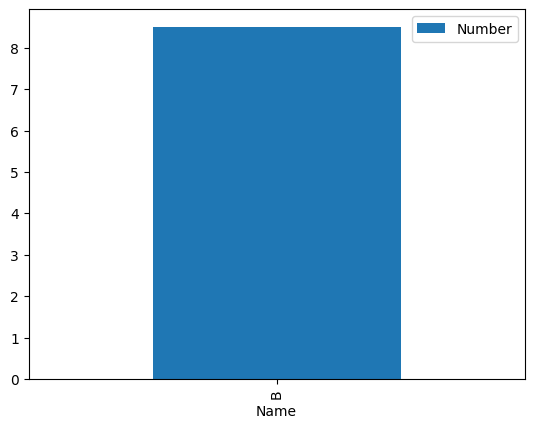

In [7]:
df_ket_qua.plot.bar(x='Name', y='Number')

Việc sử dụng DataFrame ngay lập tức làm tăng tính ứng dụng và nâng cao mức độ chuyên sâu cho đối tượng Khoa học Dữ liệu.

### **Lưu ý**: Không nên sử dụng cấu trúc cũ trong ví dụ 5.3.1.2 TLHT
```python
import sqlite3
conn = sqlite3.connect('example_db.db')
# Tạo một đối tượng con trỏ (Cursor object) từ đối tượng kết nối
cursor = conn.cursor()
# Các thao tác...

conn.close() # Rủi ro: Có thể không được gọi nếu lỗi xảy ra trước đó.
```
#### **Nên thay thế bằng** `with` 
```python
# Sử dụng cấu trúc with để quản lý kết nối
with sqlite3.connect('example_db.db') as conn:
    cursor = conn.cursor()
# Các thao tác...```


#### **LƯU Ý QUAN TRỌNG VỀ GIAO TÁC (TRANSACTION)**

Khi sử dụng cấu trúc `with sqlite3.connect(...) as conn:`:

1.  **`conn.close()`** (Đóng kết nối) sẽ được **TỰ ĐỘNG** gọi khi khối lệnh `with` kết thúc, ngay cả khi có lỗi xảy ra.
2.  **`conn.commit()`** (Lưu thay đổi/Transaction) thì **KHÔNG** được tự động gọi.
    
    ➡️ **KẾT LUẬN:** Vẫn **bắt buộc** phải gọi **`conn.commit()`** bằng tay sau các thao tác thay đổi dữ liệu (DML) như **INSERT, UPDATE, DELETE** để đảm bảo dữ liệu được lưu vĩnh viễn vào CSDL.

#### Ví dụ 5.3.3.1. Minh họa kết nối bằng cấu trúc with

In [ ]:
import sqlite3

with sqlite3.connect("mydb.db") as conn:  #file mydb.db sẽ được tạo mới nếu chưa tồn tại
    cur = conn.cursor()

    # 1. Tạo bảng (không cần parameter)
    cur.execute("""CREATE TABLE IF NOT EXISTS users( #'IF NOT EXISTS' để tránh lỗi nếu bản đã tồn tại
                    id INTEGER PRIMARY KEY,
                    name TEXT NOT NULL,
                    age INTEGER)""")

    # 2. Chèn dữ liệu an toàn với parameter, paramerer nhằm tránh hiện tượng SQL Injection
    cur.execute("INSERT INTO users (name, age) VALUES (?, ?)", #parameter kiểu ký tự '?' theo thứ tự thuộc tính
                ("Nguyễn Văn A", 30))

    cur.execute("INSERT INTO users (name, age) VALUES (:name, :age)",
                {"name": "Trần Thị B", "age": 25})

    # Chèn nhiều dòng cùng lúc với executemany()
    data = [("Lê Văn C", 27), ("Phạm Ngọc D", 31), ("Hoàng Yến", 24)]
    cur.executemany("INSERT INTO users (name, age) VALUES (?, ?)", data)

    conn.commit()  # ← Bắt buộc phải có! để lưu thay đổi DML vào CSDL
    print("Chèn thành công!")

Chèn thành công!


In [27]:
import sqlite3

# Tên file CSDL (sẽ được tạo nếu chưa tồn tại)
DB_NAME = 'student_records.db'

In [28]:
# SỬ DỤNG CẤU TRÚC WITH ĐỂ QUẢN LÝ KẾT NỐI
# conn.close() được TỰ ĐỘNG gọi khi khối lệnh kết thúc.
with sqlite3.connect(DB_NAME) as conn:
    cursor = conn.cursor()
# --- 1. DDL (Data Definition Language): Tạo bảng ---
    print("1. Thực hiện DDL: Tạo bảng 'grades'")
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS grades (
            student_id INTEGER PRIMARY KEY,
            name TEXT NOT NULL,
            score REAL
        )
    """)
    # (DDL thường được tự động commit, nhưng lập trình viên có thể commit thủ công nếu cần)
    # --- 2. DML (Data Manipulation Language): Chèn dữ liệu ---
    print("2. Thực hiện DML: Chèn dữ liệu mới")
    cursor.execute("INSERT INTO grades VALUES (?, ?, ?)",
                   (105, 'Nguyen Van A', 8.5))
    cursor.execute("INSERT INTO grades VALUES (?, ?, ?)",
                   (106, 'Tran Thi B', 7.8))

    # BẮT BUỘC: Lưu các thay đổi DML vào CSDL
    conn.commit()
    print("   -> Đã COMMIT thành công các thao tác INSERT/UPDATE/DELETE.")

    # --- 3. DML: Truy vấn dữ liệu (SELECT) ---
    print("\n3. Thực hiện DML: Truy vấn dữ liệu (SELECT)")

    # SELECT: Không cần commit
    results = cursor.execute("SELECT name, score FROM grades WHERE score >= 8.0").fetchall() #Lấy tất cả kết quả truy vấn bằng hamg fetchall()

    print(f"   -> Kết quả truy vấn (Điểm >= 8.0): {results}")

# Kết nối CSDL TỰ ĐỘNG đóng khi khối lệnh 'with' kết thúc

1. Thực hiện DDL: Tạo bảng 'grades'
2. Thực hiện DML: Chèn dữ liệu mới


IntegrityError: UNIQUE constraint failed: grades.student_id

### 5.3.3. SQL nâng cao trong python
>#### 5.3.3.1 Truy vấn Tổng hợp (GROUP BY và Hàm Tổng hợp)
#### **a. Hàm tổng hợp cơ bản**
  - COUNT() (Đếm), 
  - SUM() (Tính tổng), 
  - AVG() (Trung bình), 
  - MAX() (Lớn nhất), MIN() (Nhỏ nhất).
#### Các hàm này thường được áp dụng trên toàn bộ cột hoặc sau khi nhóm dữ liệu.
#### **b. Mục đích của GROUP BY**
#### Dùng để nhóm các hàng có giá trị trùng lặp trong một cột (hoặc nhiều cột) lại với nhau. Sau khi nhóm, các hàm tổng hợp (AVG, COUNT,...) sẽ được áp dụng lên **từng nhóm riêng biệt** thay vì toàn bộ tập dữ liệu.
#### Ví dụ, Minh họa tổng hợp
#### **Yêu cầu:** Tính số lượng sinh viên và điểm trung bình theo từng **Lớp học** (class) trong bảng sinhvien.
```python
SELECT class, 
       COUNT(*) AS Total_Students, 
       AVG(Score) AS Avg_Score
FROM bang_diem
GROUP BY class;
```

#### Ví dụ 5.3.3.1.

In [2]:
import sqlite3
import pandas as pd

# 1. Định nghĩa Tên CSDL và Câu lệnh SQL
# Sử dụng thông số của bạn: DB_NAME = 'khdl_K18.db', bảng 'sinhvien'
DB_NAME = 'khdl_K18.db'
sql_query_group_by = """
SELECT lop,
       COUNT(id) AS Total_Students,             -- Đếm số sinh viên trong mỗi lớp và gán vào cột Total_Students
       AVG(diem_tb) AS Avg_Score                -- Tính điểm trung bình của mỗi lớp và gán vào cột Avg_Score
FROM sinhvien
GROUP BY lop                                    -- Nhóm kết quả theo lớp
ORDER BY Avg_Score DESC;                        -- Sắp xếp kết quả theo điểm trung bình giảm dần
"""

# 2. Thực thi Truy vấn bằng Context Manager và Pandas
# Cấu trúc 'with' đảm bảo kết nối (conn) được đóng an toàn.
with sqlite3.connect(DB_NAME) as conn:
    # Sử dụng hàm  Pandas (pd.read_sql_query) để thực thi SQL và load thẳng kết quả vào DataFrame
    df_lop_summary = pd.read_sql_query(sql_query_group_by, conn)

# 3. Hiển thị Kết quả
print("--- KẾT QUẢ TỔNG HỢP THEO LỚP HỌC (khdl_K18.db) ---")
print(df_lop_summary)

--- KẾT QUẢ TỔNG HỢP THEO LỚP HỌC (khdl_K18.db) ---
    lop  Total_Students  Avg_Score
0  18A1               2       8.75
1  18A2               2       8.65


<Figure size 1000x600 with 0 Axes>

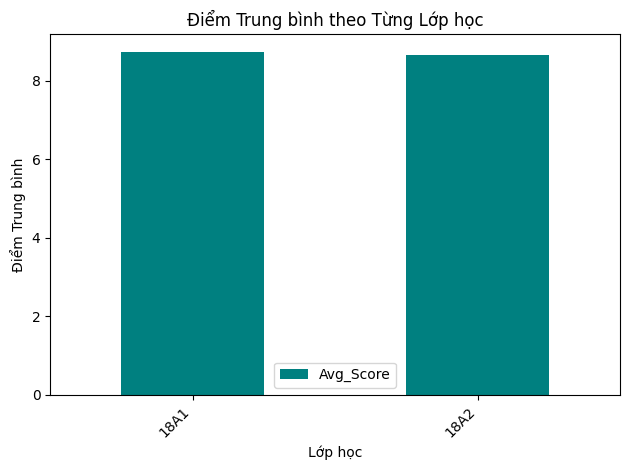

In [ ]:
# 4. Trực quan hóa (Áp dụng Mục 5.3.4)
# Code này là tùy chọn cho Data Science
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))

    # Vẽ biểu đồ cột dựa trên DataFrame
    df_lop_summary.plot.bar(x='lop', y='Avg_Score',
                            color='teal',                                   #Màu sắc cột biểu diễn
                            title='Điểm Trung bình theo Từng Lớp học')

    plt.xlabel('Lớp học')
    plt.ylabel('Điểm Trung bình')
    plt.xticks(rotation=45, ha='right')                         # Xoay nhãn trục x 45 độ để dễ đọc
    plt.tight_layout()                                          # Tự động điều chỉnh bố cục để tránh tràn lề
    plt.show()

except ImportError:
    print("\nLưu ý: Cần cài đặt matplotlib để hiển thị biểu đồ.")

#### **c. Phân biệt WHERE và HAVING (Lệnh Lọc sau khi Nhóm)**

#### Bảng so sánh

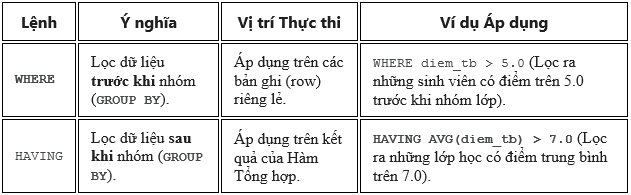

Ví dụ: 
```python
SELECT lop, COUNT(id) AS Total_Students
FROM sinhvien
WHERE ngay_sinh > '2000-01-01'   #Lọc sinh viên sinh sau 2000
GROUP BY lop
HAVING Total_Students >= 20;     #Chỉ chọn các lớp có từ 20 sinh viên trở lên
```

#### Ví dụ 5.3.3.2. Tính điểm trung bình và số lượng sinh viên theo lớp, CHỈ HIỂN THỊ những lớp có điểm trung bình lớn hơn 7.0, và sắp xếp chúng từ cao xuống thấp.

In [ ]:
import sqlite3
import pandas as pd

# 1. Định nghĩa Tên CSDL và Câu lệnh SQL (Có HAVING)
DB_NAME = 'khdl_K18.db'
sql_query_with_having = """
SELECT lop,
       COUNT(id) AS Total_Students,
       AVG(diem_tb) AS Avg_Score
FROM sinhvien
GROUP BY lop
-- Lệnh HAVING được dùng để lọc kết quả TỔNG HỢP sau khi nhóm
HAVING AVG(diem_tb) > 7.0
ORDER BY Avg_Score DESC;
"""

# 2. Thực thi Truy vấn bằng Context Manager và Pandas
# Cấu trúc 'with' đảm bảo kết nối (conn) được đóng an toàn.
with sqlite3.connect(DB_NAME) as conn:
    # Sử dụng Pandas để thực thi SQL và load thẳng kết quả vào DataFrame
    df_top_classes = pd.read_sql_query(sql_query_with_having, conn)

# 3. Hiển thị Kết quả
print("--- KẾT QUẢ CÁC LỚP CÓ ĐIỂM TRUNG BÌNH > 7.0 ---")
print(df_top_classes)

--- KẾT QUẢ CÁC LỚP CÓ ĐIỂM TRUNG BÌNH > 7.0 ---
    lop  Total_Students  Avg_Score
0  18A1               2       8.75
1  18A2               2       8.65


#### Giải thích
* #### Vị trí: Lệnh HAVING phải luôn đứng sau lệnh GROUP BY.

* #### Chức năng: Nó không lọc các bản ghi riêng lẻ (như WHERE), mà lọc các nhóm được tạo ra.

```python
    HAVING AVG(diem_tb) > 7.0 
```
#### Nghĩa là: "Chỉ giữ lại những nhóm lớp học (đã được tính toán điểm trung bình) mà có Avg_Score lớn hơn 7.0".

>#### 5.3.3.2. Kết hợp Dữ liệu giữa các Bảng (**JOIN**)
#### **a. Khái niệm và Vai trò của JOIN**
JOIN là thao tác kết hợp các hàng từ HAI HAY NHIỀU BẢNG dựa trên một cột chung (thường là Khóa ngoại - Foreign Key).
* #### Vai trò: Tái hợp dữ liệu được chia nhỏ thành nhiều bảng để phục vụ phân tích (ví dụ: kết hợp thông tin sinh viên với thông tin phòng ban, khóa học, v.v.).
#### **b. Ví dụ Khái niệm INNER JOIN**
#### Giả sử hệ thống có thêm bảng giao_vien (Giáo viên) với cột lop_phu_trach.
#### **Mục đích**: Kết hợp bảng **sinhvien** và bảng **giao_vien** qua cột chung là **lop** để biết giáo viên nào phụ trách lớp có điểm cao.
```python
    SELECT T1.ho_ten, T1.diem_tb, T2.ho_ten_gv
    FROM sinhvien AS T1                            #Chỉ định bảng sinhvien là nguồn dữ liệu chính và gán bí danh (Alias) là T1 
    INNER JOIN giao_vien AS T2                     # KẾT HỢP bảng sinhvien (T1) với bảng giao_vien (T2).
    ON T1.lop = T2.lop_phu_trach   #Chỉ định điều kiện KHỚP để kết hợp hai bảng: Các hàng sẽ được nối lại với nhau                              
                                   # khi cột lop trong bảng sinhvien bằng với cột lop_phu_trach trong bảng giao_vien.
    WHERE T1.diem_tb > 8.0;        #LỌC kết quả chỉ lấy những sinh viên có diem_tb (Điểm trung bình) lớn hơn 8.0.
```

#### Ví dụ 

In [ ]:
import sqlite3
import pandas as pd

# 1. Định nghĩa Tên CSDL
DB_NAME = 'khdl_K18.db'

# 2. Định nghĩa Câu lệnh SQL INNER JOIN
# GIẢ ĐỊNH: Có thêm bảng 'giao_vien' (T2) với cột 'lop_phu_trach'
sql_inner_join_query = """
SELECT T1.ho_ten, T1.diem_tb, T2.ho_ten_gv
FROM sinhvien AS T1
INNER JOIN giao_vien AS T2
ON T1.lop = T2.lop_phu_trach
WHERE T1.diem_tb > 8.0;
"""

# 3. Thực thi Truy vấn bằng Context Manager và Pandas
# Cấu trúc 'with' đảm bảo kết nối (conn) được đóng an toàn.
with sqlite3.connect(DB_NAME) as conn:
    # Sử dụng Pandas để thực thi SQL JOIN và load thẳng kết quả vào DataFrame
    df_join_results = pd.read_sql_query(sql_inner_join_query, conn)

# 4. Hiển thị Kết quả
print("--- KẾT QUẢ SINH VIÊN ĐIỂM CAO VÀ GIÁO VIÊN PHỤ TRÁCH (INNER JOIN) ---")
print(df_join_results)

#### 5.3.4 Vẽ biểu đồ với SQLite
#### **a. Biểu đồ cột (bar chart).**
#### Ví dụ 5.3.3.1.: Vẽ biểu đồ cột thể hiện độ tuổi của người dùng trong bảng userss.

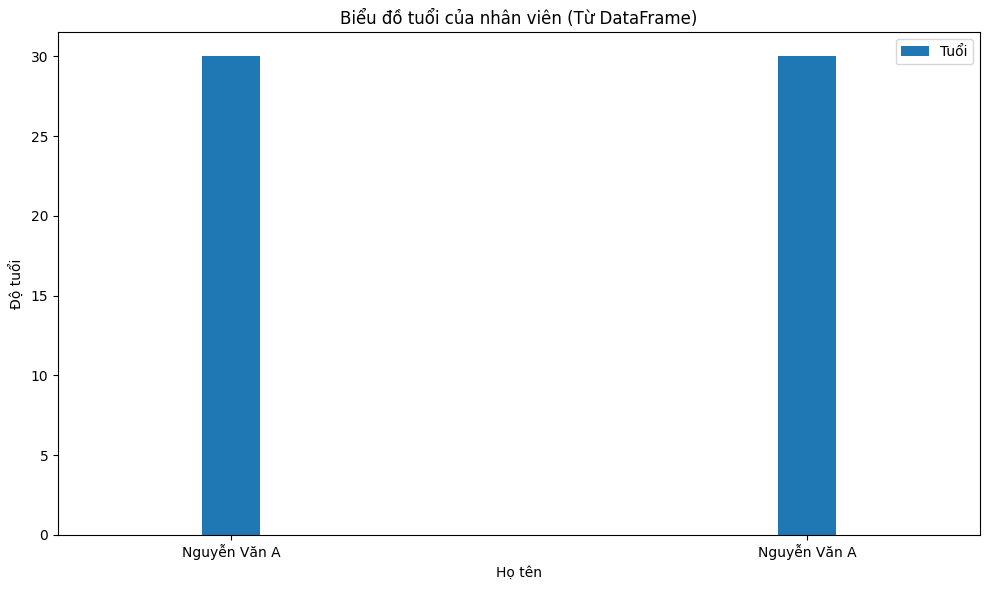

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# 1. Định nghĩa Tên CSDL và Truy vấn SQL
DB_NAME = 'mydatabase.db'
SQL_QUERY = 'SELECT "Tên", "Tuổi" FROM users'
# 2. Kết nối và Truy vấn Dữ liệu An toàn bằng Pandas
# Cấu trúc 'with' đảm bảo conn.close() được gọi tự động.
with sqlite3.connect(DB_NAME) as conn:
    # Hàm pd.read_sql_query thực hiện các thao tác:
    # - Tạo Cursor
    # - Thực thi SELECT
    # - Fetch dữ liệu
    # - Chuyển kết quả sang DataFrame (df_users)
    df_users = pd.read_sql_query(SQL_QUERY, conn) #Load dữ liệu trực tiếp vào DataFrame
# 3. Vẽ biểu đồ trực tiếp từ DataFrame (Không cần vòng lặp)
# Pandas tích hợp Matplotlib, cho phép vẽ biểu đồ trực tiếp bằng df.plot()
plt.figure(figsize=(10, 6))
df_users.plot.bar(x='Tên', y='Tuổi', ax=plt.gca(), width=0.1) # ax=plt.gca() để vẽ trên cùng một trục
plt.xlabel('Họ tên')
plt.ylabel('Độ tuổi')
plt.title('Biểu đồ tuổi của nhân viên (Từ DataFrame)')
plt.xticks(rotation=0) # Đặt tên ngang để dễ đọc hơn
plt.tight_layout()                      #
plt.show()

#### **b.	Biểu đồ đường (Line Chart)**

#### **Đặc điểm của biểu đồ Line Chart:**
* #### Thể hiện sự biến đổi của dữ liệu theo thời gian hoặc một biến số khác.
* #### Được tạo bởi việc nối các điểm dữ liệu bằng các đoạn đường thẳng.
* #### Dễ dàng nhìn thấy xu hướng, đỉnh, đáy và các biến đổi trong dữ liệu.
* #### Thích hợp cho dữ liệu có tính chất liên tục và có thời gian.
> #### Biểu đồ Line Chart rất hữu ích trong nhiều lĩnh vực, như phân tích tài chính, thống kê kinh doanh, phát triển sản phẩm, dữ liệu khoa học, và nhiều ứng dụng khác,…


#### Ví dụ 5.3.3.2: Giả sử có số liệu cơ sở dữ liệu SQLite ‘sales.db’ về doanh thu hàng năm của một công ty từ năm 2012 đến năm 2022. Hãy vẽ biểu đồ dạng line Chart thể hiện doanh thu theo các năm của công ty đó.

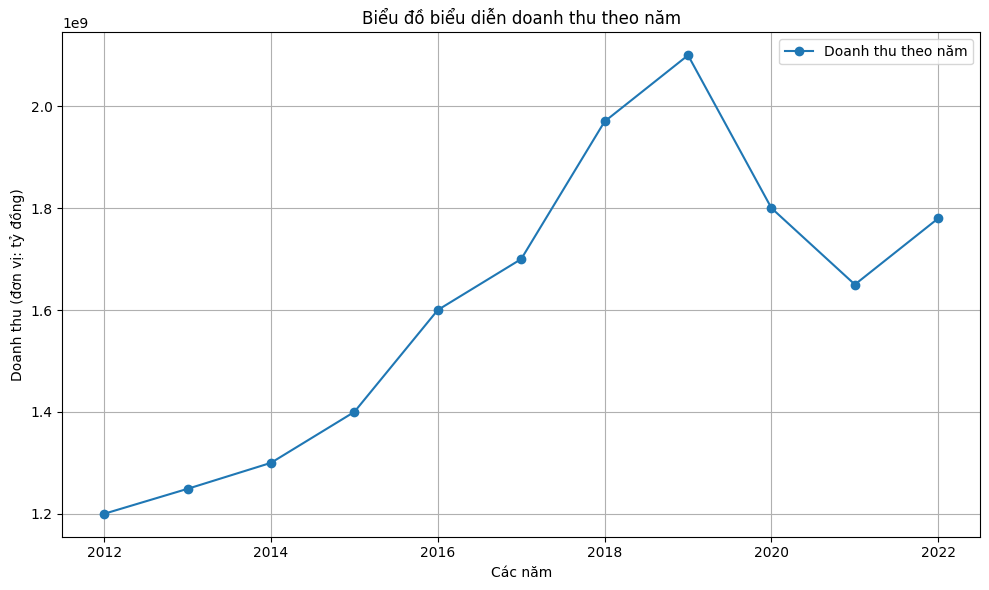

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Định nghĩa Tên CSDL và Truy vấn SQL
DB_NAME = 'sales.db'
SQL_QUERY = 'SELECT year, revenue FROM sales'   #Giả sử bảng 'sales' có cột 'year' và 'revenue'(Doanh thu)

# 2. Kết nối và Truy vấn Dữ liệu An toàn bằng Pandas
# Cấu trúc 'with' đảm bảo conn.close() được gọi tự động.
with sqlite3.connect(DB_NAME) as conn:
    # Hàm pd.read_sql_query thực hiện:
    # - Truy vấn SELECT và Fetch dữ liệu
    # - Chuyển kết quả sang DataFrame (df_sales)
    df_sales = pd.read_sql_query(SQL_QUERY, conn)           #

# 3. Vẽ biểu đồ Line Chart trực tiếp từ DataFrame
# Sử dụng df.plot.line() để vẽ biểu đồ đường, lý tưởng cho dữ liệu chuỗi thời gian.
plt.figure(figsize=(10, 6))

df_sales.plot.line(x='year',
                    y='revenue',
                    marker='o',                     # Thêm dấu chấm tại mỗi điểm dữ liệu
                    linestyle='-',
                    ax=plt.gca(),                   # Đảm bảo plot sử dụng plt.gca() để vẽ trên cùng một trục
                    title='Biểu đồ biểu diễn doanh thu theo năm')

plt.xlabel('Các năm')
plt.ylabel('Doanh thu (đơn vị: tỷ đồng)')
plt.grid(True) # Thêm lưới trên biểu đồ
plt.legend(['Doanh thu theo năm'])
plt.tight_layout()
plt.show()

**c.Biểu đồ tròn (Pie Chart)**


#### Ví dụ 5.3.3.3: Giả sử chúng ta có database về mức chi tiêu hàng tháng của một hộ gia đình như sau:

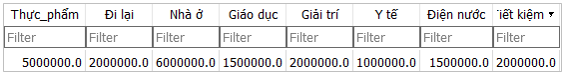


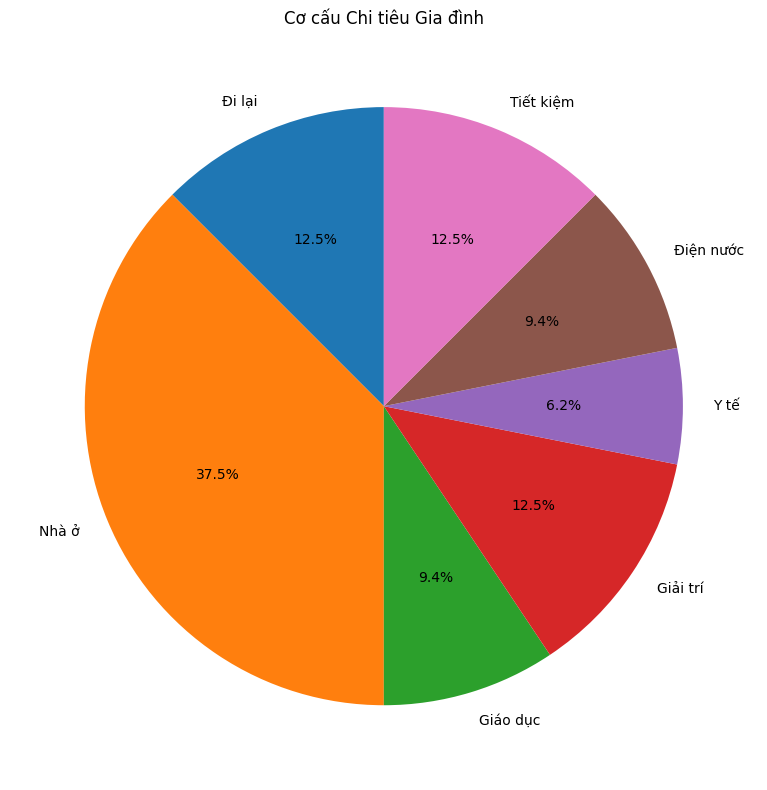

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Định nghĩa Tên CSDL và Truy vấn SQL
DB_NAME = 'ct_giadinh.db'
SQL_QUERY = 'SELECT * FROM khoan_chi'

# 2. Kết nối và Truy vấn Dữ liệu An toàn bằng Pandas
# Kết nối và lấy toàn bộ bảng vào DataFrame (df_chi)
with sqlite3.connect(DB_NAME) as conn:
    df_chi = pd.read_sql_query(SQL_QUERY, conn)

# 3. Chuyển đổi Dữ liệu sang Long Format (Thay thế logic thủ công)
# Code gốc giả định hàng đầu tiên (index 0) chứa tất cả dữ liệu cần.
# Hàm melt() chuyển các CỘT (tên chi tiêu) thành các GIÁ TRỊ (loại chi).
# Giả sử cột đầu tiên (ID) là cột định danh (id_vars) và các cột còn lại là giá trị chi.
if len(df_chi) > 0:
    # Lấy hàng đầu tiên (hoặc hàng dữ liệu duy nhất)
    df_data = df_chi.iloc[[0]].copy()

    # Sử dụng melt() để chuyển đổi từ wide format sang long format
    # df_plot sẽ có 3 cột: [Tên cột cũ], [Loại Chi], [Số Tiền]
    df_plot = df_data.melt(
        id_vars=df_data.columns[0], # Cột đầu tiên (ví dụ: ID) là cột định danh
        var_name='Loại Chi',
        value_name='Số Tiền Chi'
    )

    # Xóa cột ID nếu không cần thiết
    df_plot = df_plot.iloc[:, 1:]

    # 4. Trực quan hóa (Ví dụ: Biểu đồ tròn - Pie Chart)
    plt.figure(figsize=(8, 8))

    plt.pie(df_plot['Số Tiền Chi'],
            labels=df_plot['Loại Chi'],
            autopct='%1.1f%%',
            startangle=90)

    plt.title('Cơ cấu Chi tiêu Gia đình')
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame không có dữ liệu để xử lý.")